In [2]:
#Linear Regression model

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#to give aesthetics to the visuals, pre-setting the parameters
sns.set(rc= {'figure.figsize': (11.7, 8.27) })

In [10]:
data_used = pd.read_csv(r'C:\Users\Administrator\Desktop\Python Test Data\NPTEL\cars_sampled.csv')

In [11]:
#creating a copy for work
data = data_used.copy()

In [12]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [13]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

In [14]:
#summarising data

data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [15]:
#since not all columns are equally displayed here, and to get values in float format
pd.set_option('display.float_format', lambda x:'%.3f'%x)


In [16]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [17]:
data.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [19]:
col = ['dateCreated', 'postalCode', 'lastSeen', 'dateCreated', 'dateCrawled']

data = data.drop(columns = col, axis = 1)

In [20]:
data.head(3)

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN


In [21]:
#we hav successfully dropped the unwanted columns

In [22]:
#dropping duplicates

data.drop_duplicates(keep = 'first', inplace = True)

In [23]:
#Now we come to data cleaning
#finding number of missing values 

data.isnull().sum()

name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5183
yearOfRegistration        0
gearbox                2793
powerPS                   0
model                  2755
kilometer                 0
monthOfRegistration       0
fuelType               4498
brand                     0
notRepairedDamage      9682
dtype: int64

In [24]:
#getting yearwise counts
yearwise_counts = data['yearOfRegistration'].value_counts().sort_index()

In [25]:
print(sum(data['yearOfRegistration']> 2018))
print(sum(data['yearOfRegistration']< 1950))

26
39


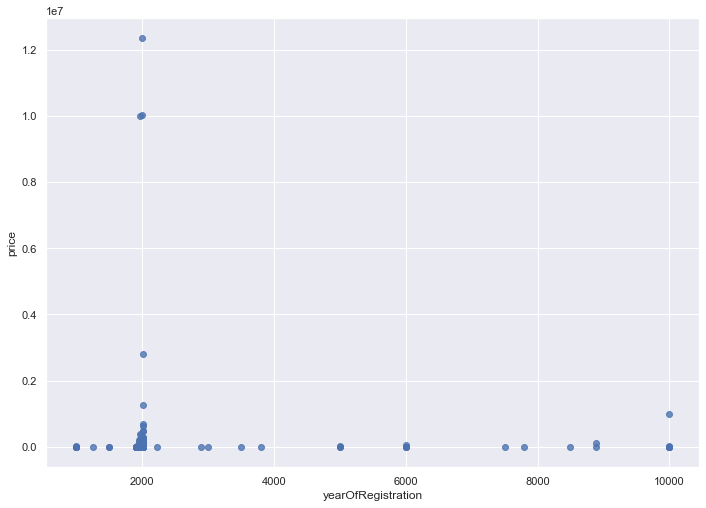

In [26]:
sns.regplot(x = 'yearOfRegistration', y = 'price', scatter = True, data= data, fit_reg = False)

In [28]:
#from the graph we understand that we're unable to understand anything.
#this is primarily because of the large values present there due to which it is smearing it's effect
#hence a considerabe amount of cleaning must be done in order to get proper results
#we want a working range within 1950 - 2018

In [31]:
price_counts = data['price'].value_counts().sort_index()

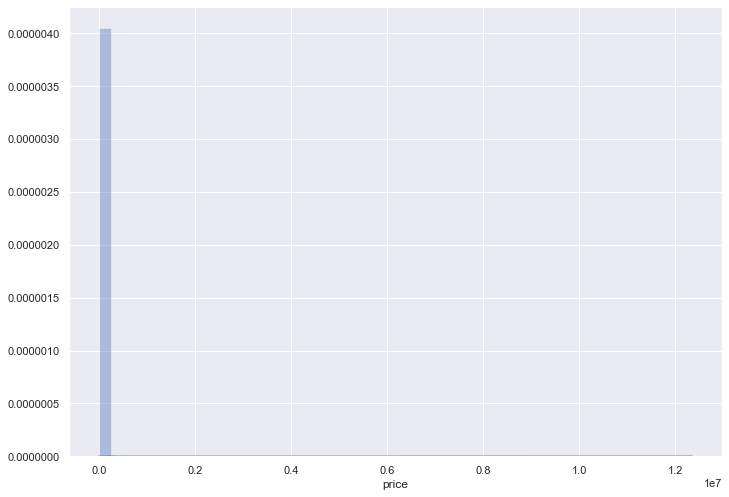

In [32]:
sns.distplot(data['price'])

In [33]:
#we can see that there are many entries against the '0' category, and hence we need to look into it


In [34]:
data['price'].describe()

count      49809.000
mean        6559.323
std        85983.041
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

In [35]:
#if we only observe the mean and median of the above data, we can observe a large skewness in the distribution

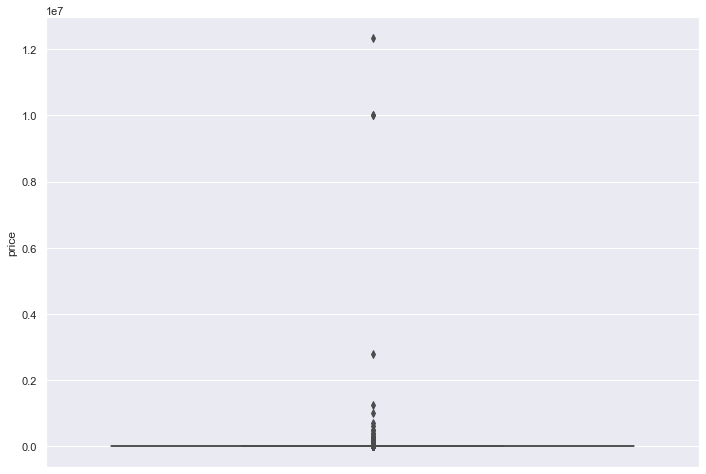

In [36]:
sns.boxplot(y = data['price'])

In [37]:
#there is no box infact, all we see are points above and away from the lines.
#this metric alone tells us that a lot of work needs to be done on the data

In [38]:
print(sum(data['price']> 150000))
print(sum(data['price']< 100))

34
1778


In [39]:
#gives us a considerable range to work with

In [44]:
#PowerPs

power_counts = data['powerPS'].value_counts().sort_index()
power_counts.describe()

count    460.000
mean     108.280
std      395.351
min        1.000
25%        1.000
50%        6.500
75%       41.250
max     5571.000
Name: powerPS, dtype: float64

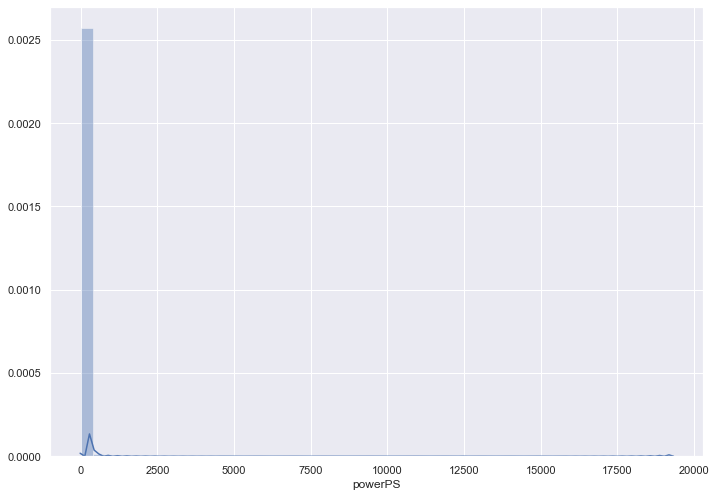

In [45]:
sns.distplot(data['powerPS'])

In [46]:
#again from the graph and everything we observe a huge discrepancy


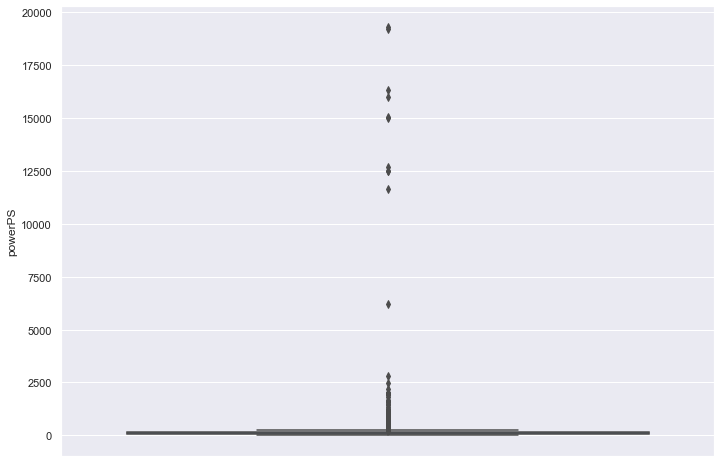

In [47]:
sns.boxplot(y = data['powerPS'])

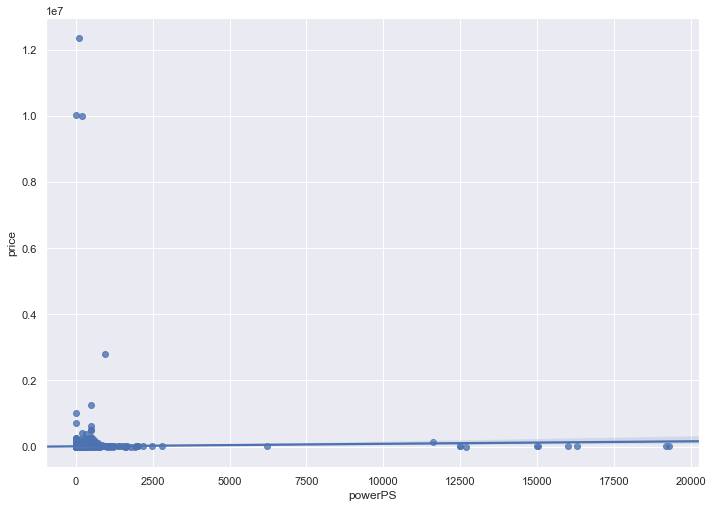

In [49]:
sns.regplot(x = 'powerPS', y = 'price', data = data, scatter = True, fit_reg= True)

In [50]:
#we need  to set a working range between 10 and 500
#a considerable amount of data needs to be dropped
# therefore, the working range of data must be made

In [52]:
data = data[
    (data.yearOfRegistration <= 2018)
& (data.yearOfRegistration >= 1950)
& (data.price <= 150000)
& (data.price>= 100)
& (data.powerPS <= 500)
& (data.powerPS >= 10)]

In [53]:
data.shape

(43001, 15)

In [54]:
data_used.shape

(50001, 19)

In [55]:
#we can see a considerable shift in dimensions

In [57]:
data['monthOfRegistration'].head(5)
data['yearOfRegistration'].head(5)

0    2003
1    2005
2    2003
3    2006
4    2008
Name: yearOfRegistration, dtype: int64

In [58]:
#hence to do variable reduction

data['monthOfRegistration'] /= 12

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
data["age"] = (2018 - data['yearOfRegistration']) + data['monthOfRegistration']
data['age'] = round(data['age'], 2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
data['age'].describe()

count   43001.000
mean       14.875
std         7.087
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: age, dtype: float64

In [61]:
#dropping the year and month columns

drop = ['yearOfRegistration', 'monthOfRegistration']
data = data.drop(columns = drop, axis = 1)

In [62]:
data.shape

(43001, 14)

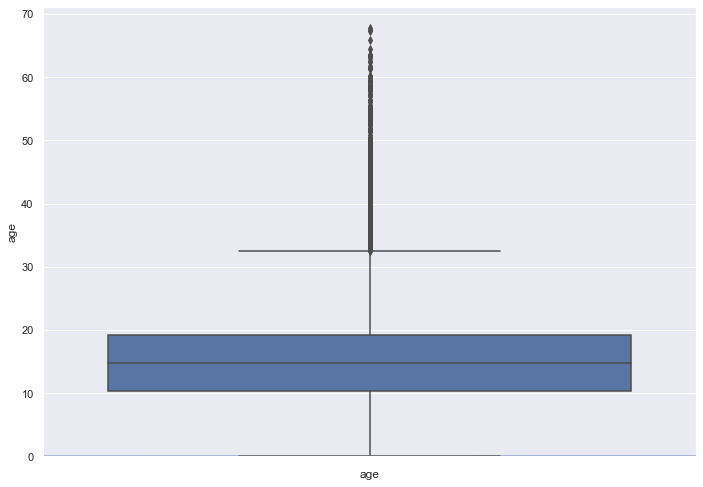

In [63]:
#visualising the parameters

sns.boxplot( y = data['age'])

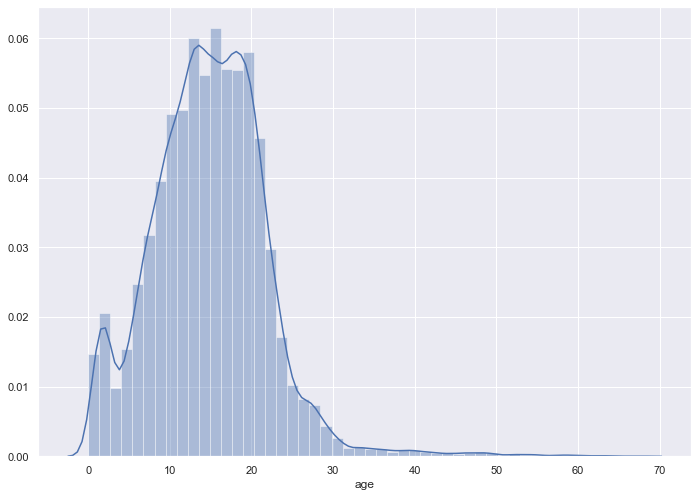

In [64]:

sns.distplot(data['age'])

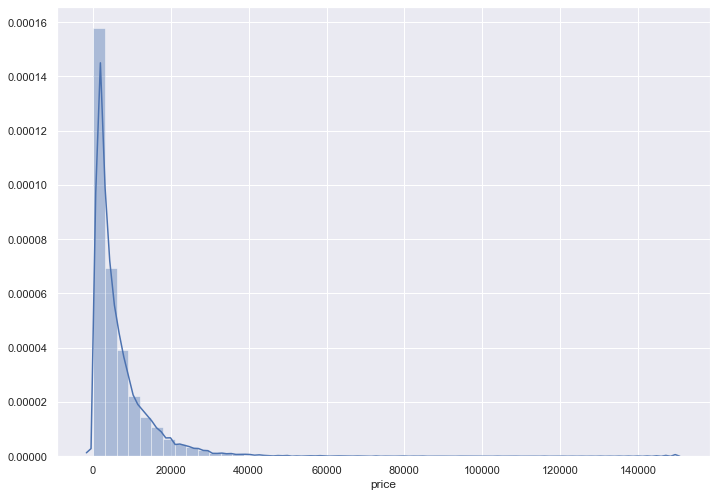

In [66]:
sns.distplot( data['price'] )

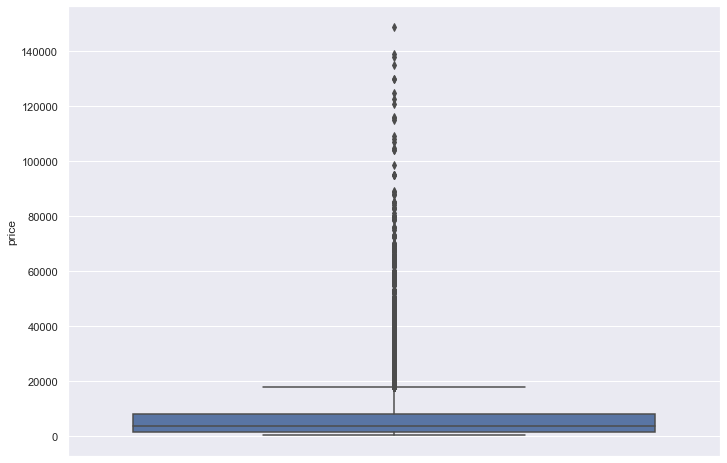

In [67]:
sns.boxplot(y = data['price'])

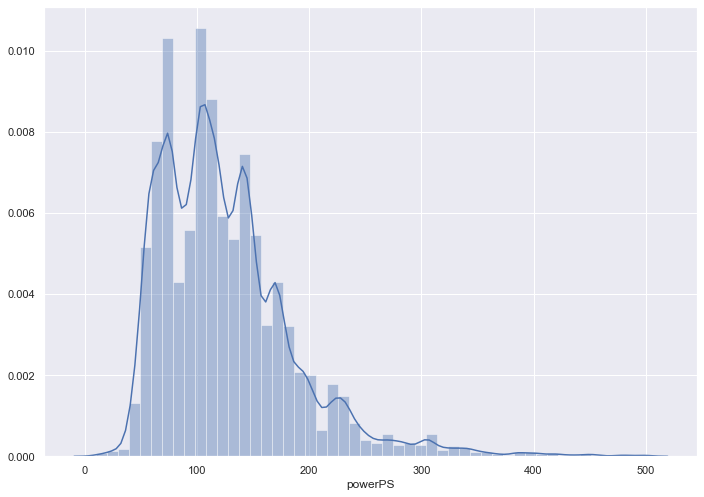

In [68]:
sns.distplot(data['powerPS'])

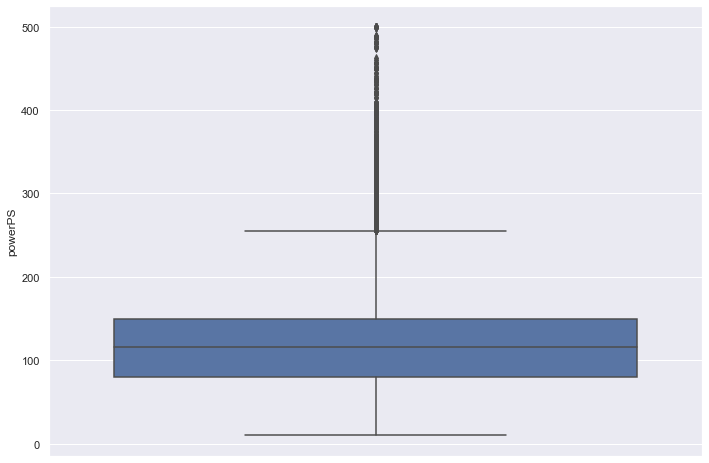

In [69]:
sns.boxplot(y = data['powerPS'])

In [70]:
# we observe data has considerably normlaised and improved in order for us to make visualisation

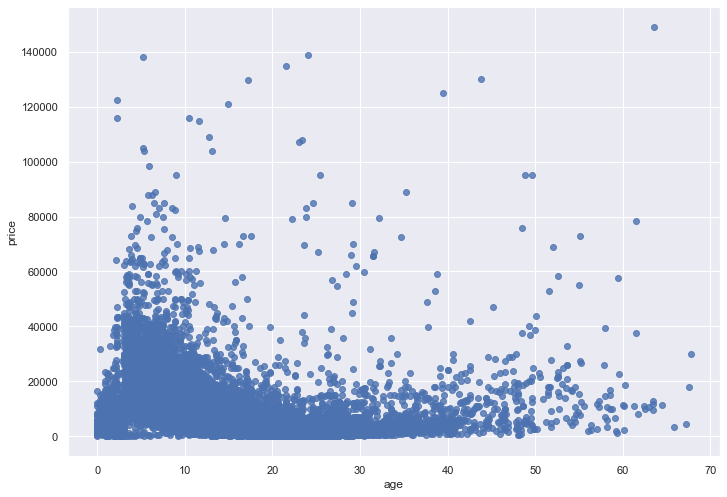

In [72]:
#visualising data after narrowing down

sns.regplot(y = data['price'], x = data['age'], scatter = True, fit_reg= False)

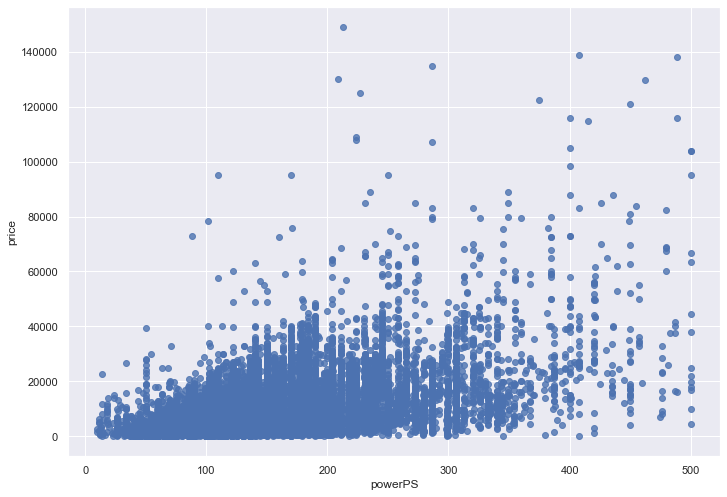

In [73]:
#powerPS vs Price
sns.regplot( x = 'powerPS', y= 'price', data= data, scatter = True, fit_reg= False )

In [74]:
#now we need to see the categorical variables
data['seller'].value_counts()

private       43000
commercial        1
Name: seller, dtype: int64

In [76]:
pd.crosstab(data['seller'], columns = 'count', normalize = False)

col_0,count
seller,
commercial,1
private,43000


In [77]:
#insight drawn is that we have fewer number or only 1 rather seller of a commercial vehicle

In [78]:
data['offerType'].value_counts()

offer    43001
Name: offerType, dtype: int64

In [80]:
pd.crosstab(data['offerType'], columns = 'count')

col_0,count
offerType,
offer,43001


In [81]:
data['abtest'].value_counts()

test       22246
control    20755
Name: abtest, dtype: int64

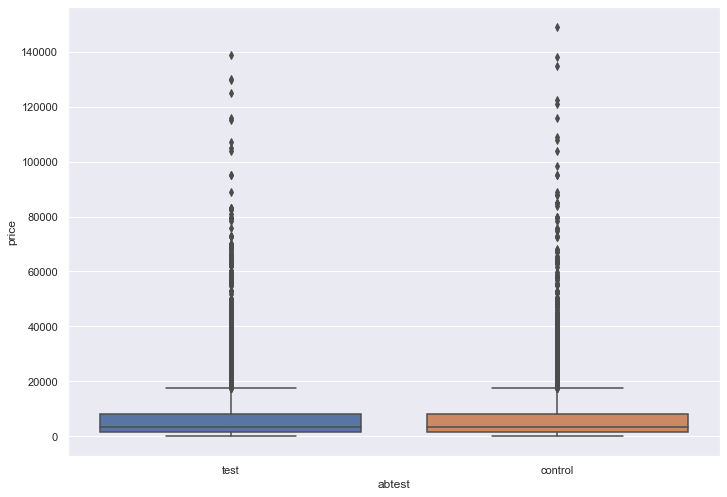

In [82]:
#we are checking whether it really has a significant use or inference on abtest

sns.boxplot(x= data['abtest'], y= data['price'])

In [83]:
#since both the types within the abtest have similar boxplots or effects it has against the price variable, we can't really 
#get any important significances or inferences from this data

In [84]:
data['vehicleType'].value_counts()

limousine        11813
small car         9344
station wagon     8119
bus               3618
cabrio            2803
coupe             2274
suv               1822
others             327
Name: vehicleType, dtype: int64

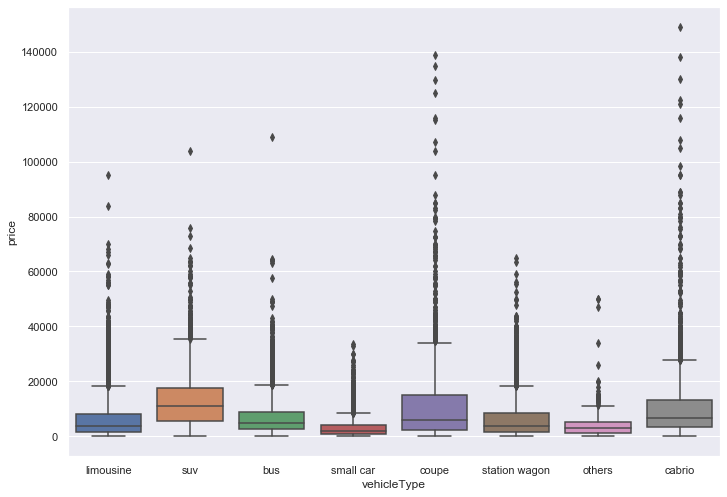

In [87]:
sns.boxplot(x = data['vehicleType'], y = data['price'])

In [88]:
#since the vehiclType has a wide range of effect on the pricing of the cars, we must keep it

In [89]:
data['gearbox'].value_counts()

manual       32759
automatic     9447
Name: gearbox, dtype: int64

In [92]:
pd.crosstab(data['gearbox'], columns = 'counts', normalize = True)

col_0,counts
gearbox,
automatic,0.224
manual,0.776


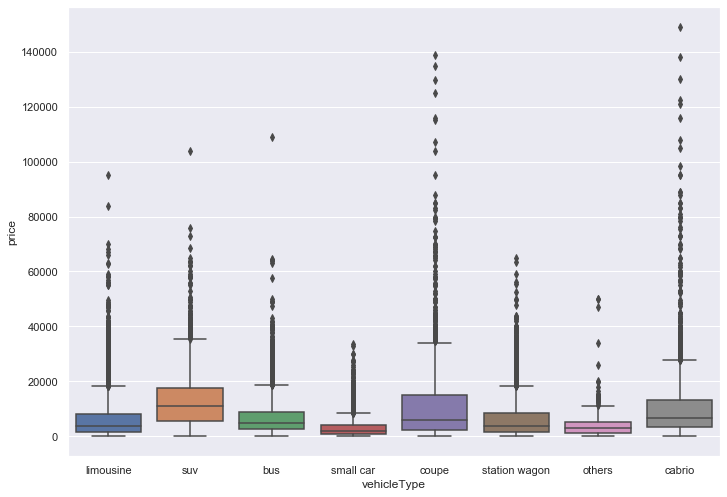

In [95]:
sns.boxplot(x= 'vehicleType', y= 'price', data= data)

In [98]:
#there seems a good variation, hence gotta keep it

In [111]:
class See:
    
    def bxplt(self, x,y):
        return boxplot(x,y)
    
    
    def ctb(self, x):
        return pd.crosstab(x, columns = 'counts', normalize = True)
    
    def vc(self,x):
        return x.value_counts()

In [104]:
a = See()
a.vc(data['model'])

golf          3500
others        2909
3er           2500
polo          1508
corsa         1402
              ... 
b_max            1
serie_2          1
200              1
rangerover       1
elefantino       1
Name: model, Length: 247, dtype: int64

In [105]:
a.ctb(data['model'])

col_0,counts
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


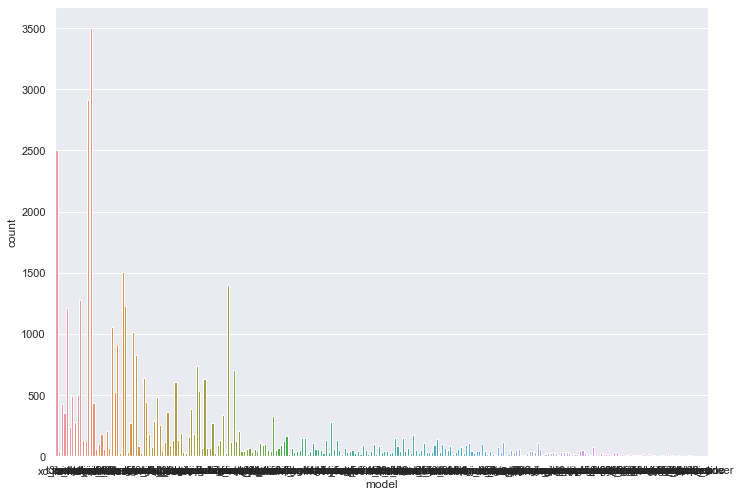

In [106]:
sns.countplot(x = 'model', data= data)

In [108]:
data['kilometer'].value_counts().sort_index()

5000        480
10000       209
20000       653
30000       715
40000       800
50000       935
60000      1108
70000      1188
80000      1385
90000      1490
100000     1838
125000     4616
150000    27584
Name: kilometer, dtype: int64

In [113]:
b = See()
b.ctb(data['kilometer'])

col_0,counts
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


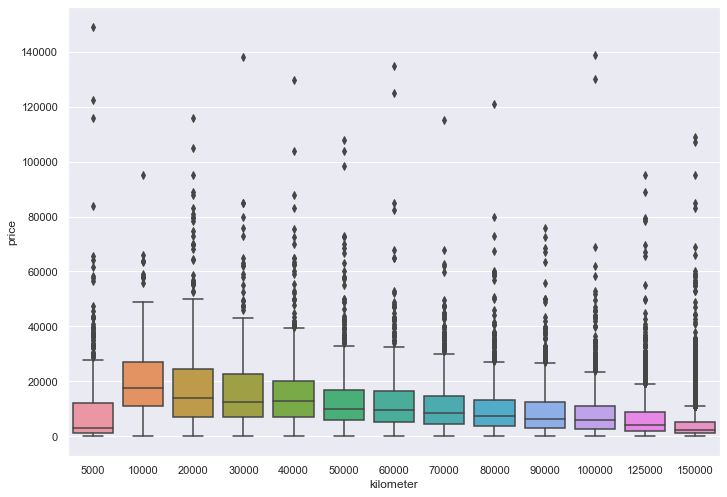

In [114]:
sns.boxplot(x= 'kilometer', y = 'price', data= data)

In [115]:
#cars with around 10000 kms have sold at a higher price comparitively

In [116]:
c = See()
c.vc(data['brand'])

volkswagen        9189
bmw               4896
opel              4522
mercedes_benz     4163
audi              3993
ford              2830
renault           1952
peugeot           1331
fiat               999
seat               887
skoda              702
mazda              667
smart              625
nissan             601
citroen            600
toyota             549
volvo              430
mini               429
hyundai            408
mitsubishi         361
sonstige_autos     301
honda              300
kia                278
suzuki             264
porsche            261
alfa_romeo         248
chevrolet          213
chrysler           152
dacia              126
subaru             112
jeep                92
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              58
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

In [117]:
c.ctb(data['brand'])

col_0,counts
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


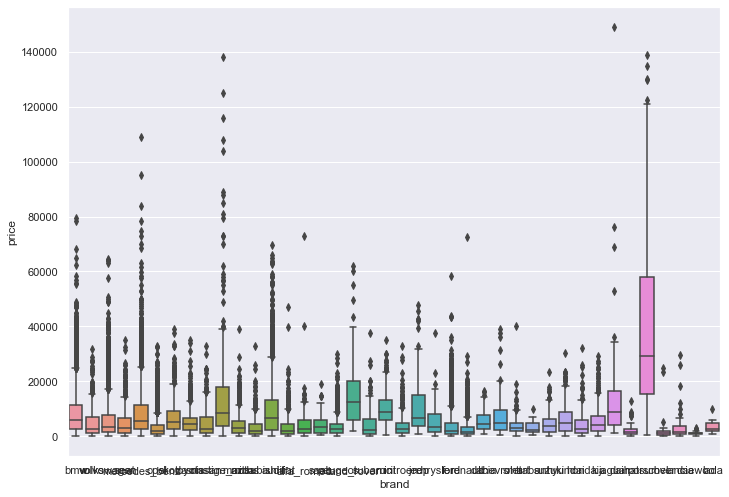

In [121]:
sns.boxplot(x = 'brand', y= 'price', data = data)

In [122]:
cols = ['seller', 'abtest', 'offerType']
data = data.drop(columns = cols, axis= 1)

In [123]:
cars = data.copy()

In [125]:
#now we have to check correlation between variables but firstly have to select specific data types

cars_new = cars.select_dtypes(exclude = [object])
cars_corr = cars_new.corr()

In [126]:
print(cars_corr)

           price  powerPS  kilometer    age
price      1.000    0.576     -0.440 -0.336
powerPS    0.576    1.000     -0.015 -0.152
kilometer -0.440   -0.015      1.000  0.292
age       -0.336   -0.152      0.292  1.000


In [130]:
cars_new.corr().loc[:,'price'].abs().sort_values(ascending= False)[1:]

powerPS     0.576
kilometer   0.440
age         0.336
Name: price, dtype: float64

In [ ]:
#we discover that there is a correlation between these presented variables, however it is not strong enough to really 
#present or extrude any inferences from them.